<a href="https://colab.research.google.com/github/petron23/ML_random_projects/blob/main/cnn_mnist_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyTorch, a popular deep learning framework
import torch
from torch import nn  # Import neural network modules

# Import torchvision, a PyTorch library for computer vision tasks
import torchvision
from torchvision import datasets  # Import datasets for computer vision
from torchvision.transforms import ToTensor  # Import image transformation functions

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Check versions to ensure compatibility
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")


PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118


In [2]:
# Set up training data
train_data = datasets.FashionMNIST(
    root="data",         # Directory where the dataset will be stored
    train=True,          # Get the training data
    download=True,       # Download the data if it doesn't exist on disk
    transform=ToTensor(), # Convert images from PIL format to Torch tensors
    target_transform=None # You can transform labels as well if needed
)

# Set up testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,          # Get the testing data
    download=True,
    transform=ToTensor()  # Similar transformation for test data
)

class_names = train_data.classes
class_names

100%|██████████| 26421880/26421880 [00:01<00:00, 16957735.64it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273219.38it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3878054.30it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5771792.83it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

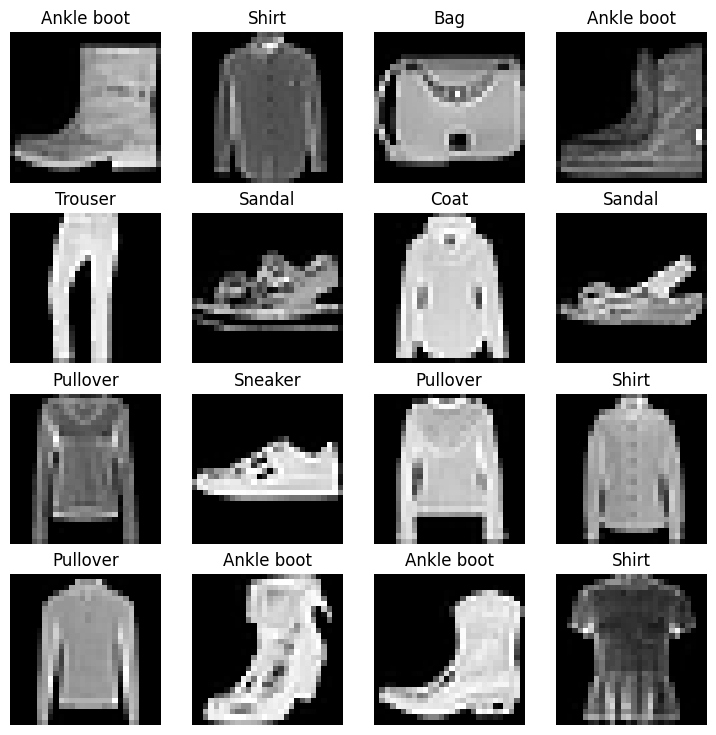

In [3]:
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
torch.manual_seed(42)

# Create a figure for plotting
fig = plt.figure(figsize=(9, 9))

# Define the number of rows and columns for the grid of images
rows, cols = 4, 4

# Loop to plot images
for i in range(1, rows * cols + 1):
    # Generate a random index to select a sample from the training dataset
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]

    # Add a subplot to the figure
    fig.add_subplot(rows, cols, i)

    # Display the image with a gray colormap
    plt.imshow(img.squeeze(), cmap="gray")

    # Add a title to the subplot, assuming you have a list of class names
    # Replace 'class_names' with your actual list of class names
    plt.title(class_names[label])

    # Turn off axis labels for cleaner presentation
    plt.axis(False)

# Show the plot with the selected images
plt.show()


In [4]:
# Import DataLoader from torch.utils.data
from torch.utils.data import DataLoader

# Define the batch size hyperparameter
BATCH_SIZE = 32

# Create data loaders for the training and testing datasets
# Data loaders allow you to iterate through the datasets in batches
train_dataloader = DataLoader(
    train_data,      # Dataset to turn into an iterable
    batch_size=BATCH_SIZE,  # Number of samples per batch
    shuffle=True   # Shuffle the data at the start of each epoch (for training)
)

test_dataloader = DataLoader(
    test_data,      # Dataset to turn into an iterable
    batch_size=BATCH_SIZE,  # Number of samples per batch
    shuffle=False  # No need to shuffle the testing data
)

# Print information about the data loaders
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x78d8cede3d30>, <torch.utils.data.dataloader.DataLoader object at 0x78d8cede2f80>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [5]:
# Use the `next` function to extract a batch of features and labels from the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# Check the shapes of the feature batch and label batch
feature_batch_shape = train_features_batch.shape
label_batch_shape = train_labels_batch.shape

# Print the shapes
print(f"Shape of the feature batch: {feature_batch_shape}")
print(f"Shape of the label batch: {label_batch_shape}")


Shape of the feature batch: torch.Size([32, 1, 28, 28])
Shape of the label batch: torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


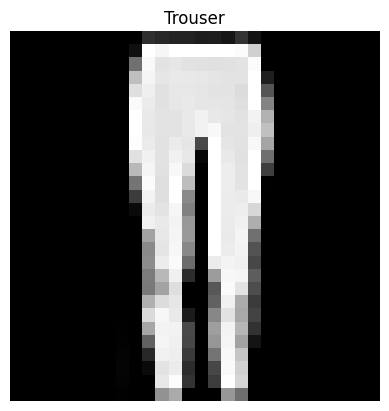

In [6]:
# Set a random seed for reproducibility
torch.manual_seed(5)

# Generate a random index to select a sample from the training batch
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

# Retrieve the image and label for the selected random index
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# Display the image
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])  # Assuming you have a list of class names
plt.axis("off")  # Turn off axis labels for cleaner presentation

# Print information about the image and label
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


##Simple linear model

In [7]:
# Import the necessary PyTorch modules
from torch import nn

# Define a custom neural network model class
class dense_model_0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        # Define the layers of the model as a sequential stack
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # Flatten the input (vectorize it)
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # Fully connected layer
            nn.Linear(in_features=hidden_units, out_features=output_shape)  # Fully connected layer
        )

    def forward(self, x):
        # Define the forward pass of the model
        return self.layer_stack(x)

In [8]:
def accuracy_fn(predictions, targets):
    """
    Calculate the accuracy of a model's predictions.

    Args:
    - predictions: Predicted class labels (e.g., model outputs).
    - targets: True class labels (ground truth).

    Returns:
    - accuracy: The accuracy of the model as a percentage.
    """
    # Ensure that the inputs have the same shape
    if predictions.shape != targets.shape:
        raise ValueError("Shape mismatch: predictions and targets must have the same shape.")

    # Calculate the number of correct predictions
    correct = (predictions == targets).sum().item()

    # Calculate the total number of examples
    total = len(targets)

    # Calculate the accuracy as a percentage
    accuracy = (correct / total) * 100.0

    return accuracy

model_0 = dense_model_0(input_shape=784, hidden_units=10, output_shape=len(class_names))
torch.manual_seed(42)
model_0.to("cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [9]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

def train(model, train_dataloader, loss_fn, optimizer):
    model.train()
    train_loss = 0.0

    for batch_idx, (X, y) in enumerate(train_dataloader):
        # 1. Forward pass
        X, y = X, y
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Backpropagation
        optimizer.zero_grad()
        loss.backward()

        # 4. Optimizer step
        optimizer.step()

    # Average the training loss over all batches
    train_loss /= len(train_dataloader)
    return train_loss

def test(model, test_dataloader, loss_fn, accuracy_fn):
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0

    with torch.no_grad():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate test loss
            test_loss += loss_fn(test_pred, y).item()

            # 3. Calculate accuracy
            test_accuracy += accuracy_fn(targets=y, predictions=test_pred.argmax(dim=1))

        # Average the test loss and accuracy over all test batches
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)

    return test_loss, test_accuracy

def train_and_evaluate(model, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3):
    # Set a random seed for reproducibility
    torch.manual_seed(42)

    # Initialize variables for tracking training time
    train_time_start_on_cpu = timer()

    # Training loop with progress bar
    for epoch in tqdm(range(epochs), desc="Epochs"):
        print(f"Epoch {epoch}:\n-------")

        # Training
        train_loss = train(model, train_dataloader, loss_fn, optimizer)

        # Testing
        test_loss, test_accuracy = test(model, test_dataloader, loss_fn, accuracy_fn)

        # Print training and testing results
        print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")

    # Calculate and print the total training time
    train_time_end_on_cpu = timer()
    total_train_time_model = train_time_end_on_cpu - train_time_start_on_cpu
    print(f"Total training time: {total_train_time_model:.2f} seconds")


In [10]:
train_and_evaluate(model_0, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3)

Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0:
-------
Train loss: 0.59030 | Test loss: 0.50375, Test acc: 82.41%
Epoch 1:
-------
Train loss: 0.48061 | Test loss: 0.48872, Test acc: 82.74%
Epoch 2:
-------
Train loss: 0.45850 | Test loss: 0.48213, Test acc: 83.34%
Total training time: 30.66 seconds


# General evaluator

In [11]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(targets=y,
                                predictions=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'dense_model_0',
 'model_loss': 0.4821264445781708,
 'model_acc': 83.33666134185303}

#Other models

In [12]:
class dense_model_1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [13]:
model_1 = dense_model_1(input_shape=784, hidden_units=10, output_shape=len(class_names))
torch.manual_seed(42)
model_1.to("cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [14]:
train_and_evaluate(model_1, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3)

Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0:
-------
Train loss: 0.98248 | Test loss: 0.76060, Test acc: 72.80%
Epoch 1:
-------
Train loss: 0.70366 | Test loss: 0.71731, Test acc: 73.67%
Epoch 2:
-------
Train loss: 0.67375 | Test loss: 0.69170, Test acc: 74.81%
Total training time: 27.76 seconds


# Recreating the whole thing using GPU

In [15]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
import torch
from tqdm.auto import tqdm
from timeit import default_timer as timer

def train_gpu(model: torch.nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          device: torch.device = device):
    model.to(device)
    model.train()
    train_loss = 0.0

    for batch_idx, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Backpropagation
        optimizer.zero_grad()
        loss.backward()

        # 4. Optimizer step
        optimizer.step()

    # Average the training loss over all batches
    train_loss /= len(train_dataloader)
    return train_loss

def test_gpu(model: torch.nn.Module,
         data_loader: torch.utils.data.DataLoader,
         loss_fn: torch.nn.Module,
         accuracy_fn,
         device: torch.device = device):
    model.to(device)
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0

    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate test loss
            test_loss += loss_fn(test_pred, y).item()

            # 3. Calculate accuracy
            test_accuracy += accuracy_fn(targets=y, predictions=test_pred.argmax(dim=1))

        # Average the test loss and accuracy over all test batches
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)

    return test_loss, test_accuracy

def train_and_evaluate_gpu(model, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3):
    # Set a random seed for reproducibility
    torch.manual_seed(42)

    # Initialize variables for tracking training time
    train_time_start_on_gpu = timer()

    # Training loop with progress bar
    for epoch in tqdm(range(epochs), desc="Epochs"):
        print(f"Epoch {epoch}:\n-------")

        # Training
        train_loss = train_gpu(model, train_dataloader, loss_fn, optimizer)

        # Testing
        test_loss, test_accuracy = test_gpu(model, test_dataloader, loss_fn, accuracy_fn)

        # Print training and testing results
        print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")

    # Calculate and print the total training time
    train_time_end_on_gpu = timer()
    total_train_time_model = train_time_end_on_gpu - train_time_start_on_gpu
    print(f"Total training time: {total_train_time_model:.2f} seconds on {next(model.parameters()).device}")


In [17]:
torch.manual_seed(42)
model_1_b = dense_model_1(input_shape=784, hidden_units=10, output_shape=len(class_names))
#model_1.to("cpu")
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1_b.parameters(), lr=0.1)

In [18]:
train_and_evaluate_gpu(model_1_b, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=3)

Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0:
-------
Train loss: 1.09199 | Test loss: 0.95637, Test acc: 65.00%
Epoch 1:
-------
Train loss: 0.78101 | Test loss: 0.72227, Test acc: 73.91%
Epoch 2:
-------
Train loss: 0.67027 | Test loss: 0.68500, Test acc: 75.02%
Total training time: 38.89 seconds on cuda:0


Took longer than the cpu version as the model is too small so couldn't make any advantage of it.

In [19]:
torch.manual_seed(42)
def eval_model_gpu(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):

    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(targets=y,
                                predictions=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}



In [20]:
# Calculate model 0 results on test dataset
model_1_b_results = eval_model_gpu(model=model_1_b, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_1_b_results

{'model_name': 'dense_model_1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

# CNNs

In [114]:
class CNN_model_0(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, channels_1: int, channels_2: int,channels_3: int,channels_4: int):
      super().__init__()
      self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=channels_1,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=channels_1,
                      out_channels=channels_2,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
      )
      self.block_2 = nn.Sequential(
          nn.Conv2d(in_channels=channels_2, out_channels=channels_3, kernel_size = 3, padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=channels_3, out_channels=channels_4, kernel_size = 3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=channels_4*7*7,
                    out_features=output_shape)
      )
    def forward(self, x):
          x = self.block_1(x)
          x = self.block_2(x)
          x = self.classifier(x)

          return x

In [115]:
torch.manual_seed(42)
model_2 = CNN_model_0(input_shape=1,
    channels_1=10,
    channels_2=10,
    channels_3=10,
    channels_4=10,
    output_shape=len(class_names)).to(device)
model_2

CNN_model_0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Some properties of conv layers in pytorch

In [116]:
images = torch.randn(size=(32, 3, 5, 5))
test_image = images[0]
print(images.shape, test_image.shape)
test_image_batched = test_image.unsqueeze(dim=0)
print(test_image_batched.shape)

torch.Size([32, 3, 5, 5]) torch.Size([3, 5, 5])
torch.Size([1, 3, 5, 5])


In [117]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=5,
                       kernel_size=2,
                       stride=1,
                       padding=0)
cl_1 = conv_layer(test_image_batched)
print(cl_1.shape)

torch.Size([1, 5, 4, 4])


In [118]:
print(conv_layer.state_dict()["weight"].shape) #5: output channels, 3:input channels, 2,2: kernel

torch.Size([5, 3, 2, 2])


In [119]:
print(conv_layer.state_dict()["bias"].shape) #5: output channels, 3:input channels, 2,2: kernel

torch.Size([5])


In [120]:
conv_layer.state_dict();

Loss function and optimizer for the cnn model

In [121]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

In [122]:
train_and_evaluate_gpu(model_2, train_dataloader, test_dataloader, loss_fn, optimizer, accuracy_fn, epochs=10)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0:
-------
Train loss: 0.59256 | Test loss: 0.39478, Test acc: 86.09%
Epoch 1:
-------
Train loss: 0.36237 | Test loss: 0.35377, Test acc: 86.97%
Epoch 2:
-------
Train loss: 0.32505 | Test loss: 0.33112, Test acc: 87.93%
Epoch 3:
-------
Train loss: 0.30483 | Test loss: 0.32534, Test acc: 88.21%
Epoch 4:
-------
Train loss: 0.28913 | Test loss: 0.31132, Test acc: 88.69%
Epoch 5:
-------
Train loss: 0.27896 | Test loss: 0.31575, Test acc: 88.77%
Epoch 6:
-------
Train loss: 0.27175 | Test loss: 0.31786, Test acc: 88.51%
Epoch 7:
-------
Train loss: 0.26498 | Test loss: 0.30290, Test acc: 89.34%
Epoch 8:
-------
Train loss: 0.26065 | Test loss: 0.31370, Test acc: 89.05%
Epoch 9:
-------
Train loss: 0.25643 | Test loss: 0.30483, Test acc: 89.07%
Total training time: 123.56 seconds on cuda:0


In [30]:
model_2.state_dict().keys()

odict_keys(['block_1.0.weight', 'block_1.0.bias', 'block_1.2.weight', 'block_1.2.bias', 'block_2.0.weight', 'block_2.0.bias', 'block_2.2.weight', 'block_2.2.bias', 'classifier.1.weight', 'classifier.1.bias'])

In [31]:
model_2.state_dict()["block_1.0.weight"]

tensor([[[[ 0.4986,  0.1253, -0.6424],
          [ 0.1976,  0.2006, -0.0559],
          [-0.6214,  0.2709,  0.5055]]],


        [[[-0.4235,  0.3667,  0.0285],
          [ 0.0164,  0.4649,  0.1074],
          [-0.5573,  0.4063,  0.2238]]],


        [[[-0.3738, -0.2040,  0.2395],
          [-1.1267, -1.0698, -0.0536],
          [-1.1735, -1.0872, -0.1350]]],


        [[[-1.2903, -1.8130, -0.8170],
          [ 0.4562, -0.9621,  0.1854],
          [ 0.2646, -0.1103,  0.4571]]],


        [[[ 0.3110,  0.1914, -0.4789],
          [-0.0977,  0.4305, -0.6172],
          [ 0.3058,  0.3139, -0.3710]]],


        [[[-0.1012,  0.2406,  0.0983],
          [ 0.2041, -0.2029, -0.3339],
          [-0.1093, -0.2584,  0.2496]]],


        [[[ 0.3347,  0.3017,  0.1752],
          [ 0.2962,  0.0029, -0.4773],
          [-0.2519, -1.1176, -0.1265]]],


        [[[-0.0220, -0.0839, -0.3201],
          [ 0.2726, -0.3838, -0.6836],
          [-0.2779,  0.6167,  0.3458]]],


        [[[ 0.7671, -0.6672, -0.

(array([ 1.,  0.,  6.,  3.,  6., 11., 20., 21., 18.,  4.]),
 array([-1.81302238, -1.55501127, -1.29700017, -1.03898919, -0.78097808,
        -0.52296698, -0.26495594, -0.00694486,  0.25106621,  0.50907731,
         0.76708835]),
 <BarContainer object of 10 artists>)

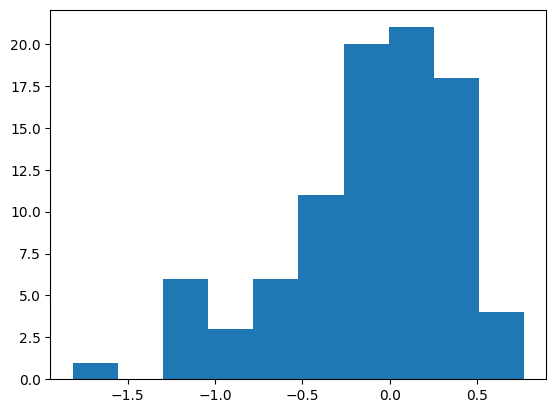

In [32]:
import matplotlib.pyplot as plt

plt.hist(model_2.state_dict()["block_1.0.weight"].cpu().reshape(-1))

(array([   4.,   22.,  101.,  471., 1823., 1755.,  546.,  130.,   41.,
           7.]),
 array([-0.83633679, -0.6703912 , -0.50444555, -0.33849996, -0.17255436,
        -0.00660875,  0.15933685,  0.32528245,  0.49122807,  0.65717369,
         0.82311928]),
 <BarContainer object of 10 artists>)

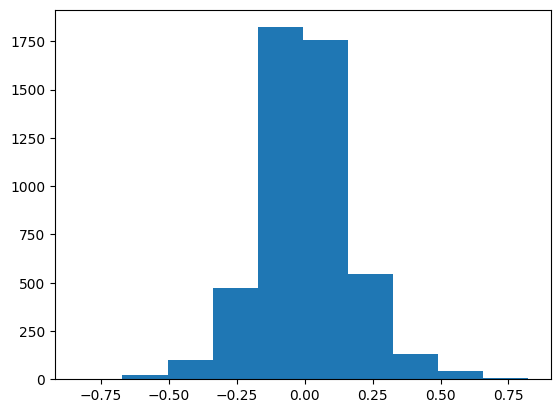

In [33]:
plt.hist(model_2.state_dict()["classifier.1.weight"].cpu().reshape(-1))

# Let's make further predictions with the cnn

In [75]:
import torch
from typing import List, Optional

def make_predictions(model: torch.nn.Module,
                     data: List[torch.Tensor],
                     device: Optional[torch.device] = None) -> torch.Tensor:
    """
    Make predictions using a PyTorch model on a list of data samples.

    Args:
    - model (torch.nn.Module): A PyTorch model for making predictions.
    - data (List[torch.Tensor]): List of data samples for prediction.
    - device (Optional[torch.device]): The device (CPU or GPU) on which to perform predictions.
      If not specified, the CPU is used by default.

    Returns:
    - torch.Tensor: Predicted probabilities for each data sample.
    """
    if device is None:
        device = torch.device('cpu')

    pred_probs = []
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for sample in data:
            sample = sample.unsqueeze(0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)


In [89]:
import random
random.seed(14)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")
print(next(model_2.parameters()).is_cuda)

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 7 (Sneaker)
False


In [90]:
len(test_samples)

9

In [91]:
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[4.1064e-08, 7.8975e-08, 1.5470e-09, 1.8058e-07, 2.0139e-08, 3.7874e-04,
         1.3620e-09, 9.9850e-01, 2.3802e-05, 1.0972e-03],
        [7.1585e-07, 4.6061e-10, 1.2692e-07, 2.5455e-09, 5.3340e-10, 9.9998e-01,
         5.5986e-08, 9.5835e-08, 1.4211e-07, 1.3847e-05]])

In [105]:
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)
print(test_labels)


tensor([7, 5, 9, 7, 0, 7, 8, 3, 3])
[7, 5, 9, 7, 0, 7, 8, 3, 3]


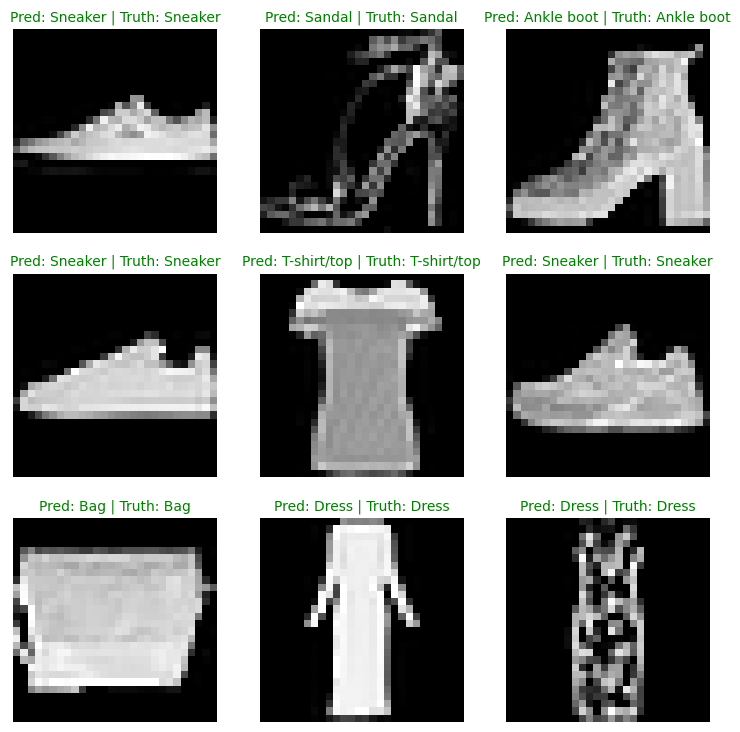

In [108]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g")
  else:
      plt.title(title_text, fontsize=10, c="r")
  plt.axis(False);

## Confusion matrix

In [124]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, "Predictions"):
    X, y = X.to(device), y.to(device)
    y_pred = torch.softmax(model_2(X).to(device),dim=1).argmax(dim=1) #the predicted class from the model_2's output which makes first a logit then a softmax probability then chooses the class corresponding the highest probabilty
    y_preds.append(y_pred)
y_pred_tensor = torch.cat(y_preds)

Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [127]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.1 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [128]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


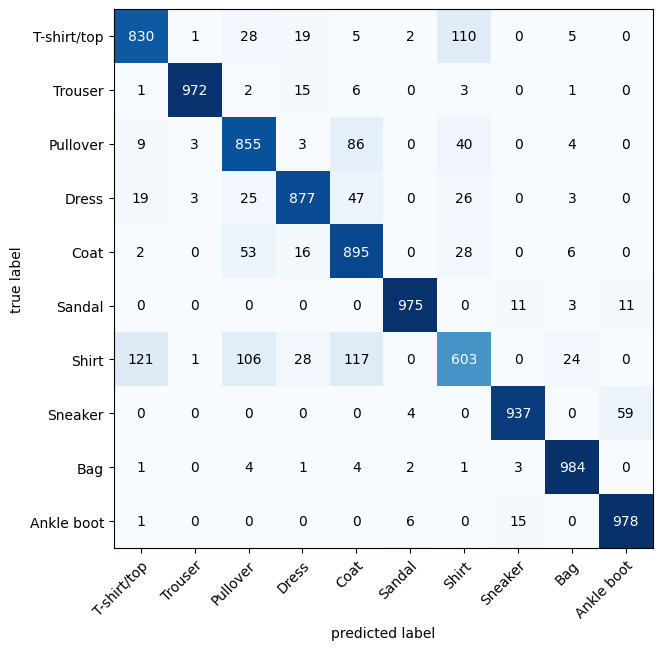

In [134]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor.to("cpu"),
                         target=test_data.targets.to("cpu"))

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## Save and load model

In [135]:
from pathlib import Path
## SAVING


MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True
)

# Create model save path
MODEL_NAME = "cnn_model_mnist.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/cnn_model_mnist.pth


In [147]:
## LOADING using torch.load_state_dict

loaded_model_2 = CNN_model_0(input_shape=1,
    channels_1=10,
    channels_2=10,
    channels_3=10,
    channels_4=10,
    output_shape=len(class_names)).to(device)

#loading in state_dict

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2 = loaded_model_2.to("cpu")

In [148]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'CNN_model_0',
 'model_loss': 0.30483004450798035,
 'model_acc': 89.06749201277955}

In [156]:
model_2_results = eval_model(
    model=model_2.to("cpu"),
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'CNN_model_0',
 'model_loss': 0.30483004450798035,
 'model_acc': 89.06749201277955}

In [157]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001)

tensor(True)